In [1]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reding the data set
df=pd.read_csv("Automobile_data.csv")

# For printing the shape (No of rows, No of columns)
print(df.shape)

# For printing the first five rows of the data set
df.head(5)

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Data Set Information:

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. 

Note: Several of the attributes in the database could be used as a "class" attribute.


# Attribute Information:

Attribute: Attribute Range 

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 
4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

In [3]:
# Getting the data types and null values of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [4]:
# Getting the data types of the data set
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
# Statistics of the data set
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
# Find out if there are null fields
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
# For priting unique values of columns with object data type
for label in df.columns:
    if(df[label].dtypes=="O"):
        print("Unique elements present in column: ",label)
        print("------------------------------------------------")
        print(df[label].unique())
        print("-"*120)
        print()

Unique elements present in column:  normalized-losses
------------------------------------------------
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
------------------------------------------------------------------------------------------------------------------------

Unique elements present in column:  make
------------------------------------------------
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
------------------------------------------------------------------------------------------------------------------------

Unique elements present in column:  fuel-ty

As we observe the dataset we see that there is "?" symbol in some columns so we have to clean it

In [8]:
# Finding the columns in which "?" symobol is present
ColumnWithQuesMark=[]
for label in df.columns:
    if(df[label].dtypes=="O"):
        if(len(df[label][df[label]=="?"])>0):
            ColumnWithQuesMark.append(label)
print(ColumnWithQuesMark)

['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [9]:
# Computing the number of records having '?' value in different columns
for label in ColumnWithQuesMark:
    print("No of ? symbol in",label,"Column is:",df[label][df[label]=="?"].count())
    print("-"*100)
    print()

No of ? symbol in normalized-losses Column is: 41
----------------------------------------------------------------------------------------------------

No of ? symbol in num-of-doors Column is: 2
----------------------------------------------------------------------------------------------------

No of ? symbol in bore Column is: 4
----------------------------------------------------------------------------------------------------

No of ? symbol in stroke Column is: 4
----------------------------------------------------------------------------------------------------

No of ? symbol in horsepower Column is: 2
----------------------------------------------------------------------------------------------------

No of ? symbol in peak-rpm Column is: 2
----------------------------------------------------------------------------------------------------

No of ? symbol in price Column is: 4
----------------------------------------------------------------------------------------------------


In [10]:
value=df['normalized-losses'][df['normalized-losses'] != '?']
l=value.astype(float).mean()
l

122.0

In [11]:
# Setting the missing value to mean of normalized losses and convert the datatype to float

# Listing the values other than ?
value=df['normalized-losses'][df['normalized-losses'] != '?']

# Covering datatype to float
value=value.astype(float)

# Calculating the mean
l=value.mean()

# Replacing the ? symbol with mean value
df['normalized-losses'] = df['normalized-losses'].replace('?',l)

# Converting the data type of whole cloumn to float
df['normalized-losses']=df['normalized-losses'].astype(float)

# Printing the first 5 values
df['normalized-losses'].head(5)

0    122.0
1    122.0
2    122.0
3    164.0
4    164.0
Name: normalized-losses, dtype: float64

Similarly we have to clean ? from rest of the columns

In [12]:
# Setting the missing value to mean of price and convert the datatype to float

column="price"
# Listing the values other than ?
value=df[column][df[column] != '?']

# Covering datatype to float
value=value.astype(float)

# Calculating the mean
l=value.mean()

# Replacing the ? symbol with mean value
df[column] = df[column].replace('?',l)

# Converting the data type of whole cloumn to float
df[column]=df[column].astype(float)

# Printing the first 5 values
df[column].head(5)

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [13]:
# Setting the missing value to mean of peak-rpm and convert the datatype to float

column="peak-rpm"
# Listing the values other than ?
value=df[column][df[column] != '?']

# Covering datatype to float
value=value.astype(float)

# Calculating the mean
l=value.mean()

# Replacing the ? symbol with mean value
df[column] = df[column].replace('?',l)

# Converting the data type of whole cloumn to float
df[column]=df[column].astype(float)

# Printing the first 5 values
df[column].head(5)

0    5000.0
1    5000.0
2    5000.0
3    5500.0
4    5500.0
Name: peak-rpm, dtype: float64

In [14]:
# Setting the missing value to mean of horsepower and convert the datatype to float

column="horsepower"
# Listing the values other than ?
value=df[column][df[column] != '?']

# Covering datatype to float
value=value.astype(float)

# Calculating the mean
l=value.mean()

# Replacing the ? symbol with mean value
df[column] = df[column].replace('?',l)

# Converting the data type of whole cloumn to float
df[column]=df[column].astype(float)

# Printing the first 5 values
df[column].head(5)

0    111.0
1    111.0
2    154.0
3    102.0
4    115.0
Name: horsepower, dtype: float64

In [15]:
# Setting the missing value to mean of stroke and convert the datatype to float

column="stroke"
# Listing the values other than ?
value=df[column][df[column] != '?']

# Covering datatype to float
value=value.astype(float)

# Calculating the mean
l=value.mean()

# Replacing the ? symbol with mean value
df[column] = df[column].replace('?',l)

# Converting the data type of whole cloumn to float
df[column]=df[column].astype(float)

# Printing the first 5 values
df[column].head(5)

0    2.68
1    2.68
2    3.47
3    3.40
4    3.40
Name: stroke, dtype: float64

In [16]:
# Setting the missing value to mean of bore and convert the datatype to float

column="bore"
# Listing the values other than ?
value=df[column][df[column] != '?']

# Covering datatype to float
value=value.astype(float)

# Calculating the mean
l=value.mean()

# Replacing the ? symbol with mean value
df[column] = df[column].replace('?',l)

# Converting the data type of whole cloumn to float
df[column]=df[column].astype(float)

# Printing the first 5 values
df[column].head(5)

0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
Name: bore, dtype: float64

In [17]:
# For num-of-doors remove the records which are having the value '?'
df = df[df['num-of-doors'] != '?']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
symboling            203 non-null int64
normalized-losses    203 non-null float64
make                 203 non-null object
fuel-type            203 non-null object
aspiration           203 non-null object
num-of-doors         203 non-null object
body-style           203 non-null object
drive-wheels         203 non-null object
engine-location      203 non-null object
wheel-base           203 non-null float64
length               203 non-null float64
width                203 non-null float64
height               203 non-null float64
curb-weight          203 non-null int64
engine-type          203 non-null object
num-of-cylinders     203 non-null object
engine-size          203 non-null int64
fuel-system          203 non-null object
bore                 203 non-null float64
stroke               203 non-null float64
compression-ratio    203 non-null float64
horsepower           203 non-

In [18]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Up to this we successfully remove the ? symbol from the data set

# Univariate Analysis

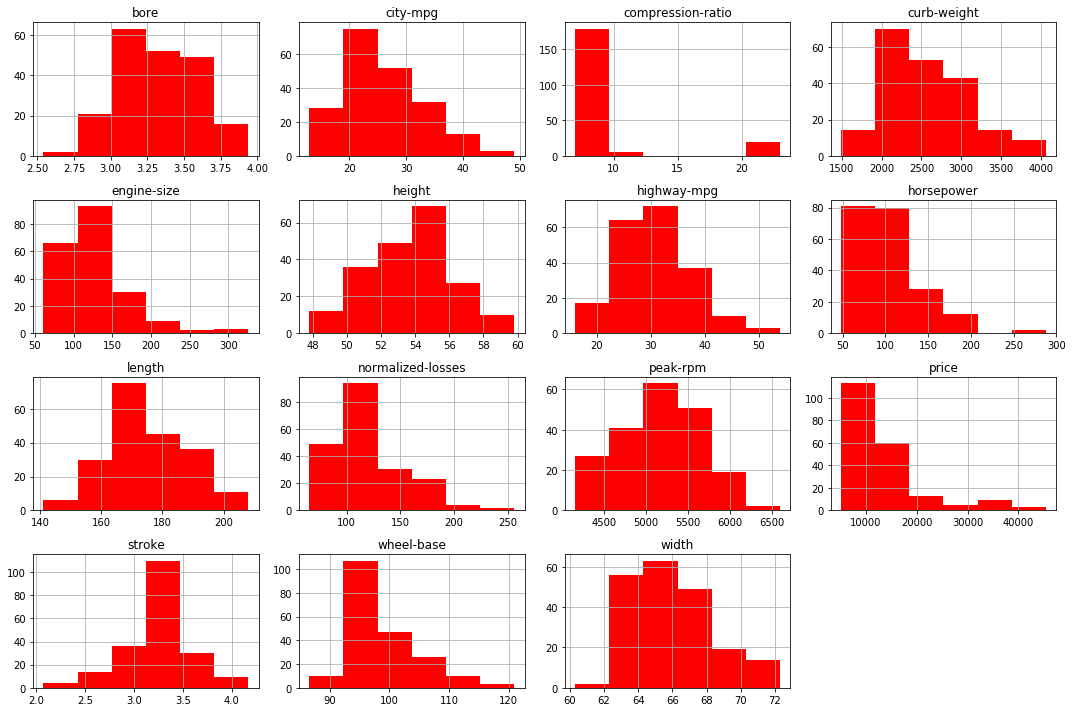

In [19]:
# Plot of contineous variables

df[["normalized-losses", "wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore",
    "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
    "highway-mpg", "price"]].hist(figsize=(15,10),bins=6,color='r')

plt.tight_layout()
plt.show()

Informations from the above plot

1. Most of the vehicals are there with bore in the range 3 to 3.7
2. Most of the vehicals are there whose city-mgd is in the range 19 to 31
3. Most of the vehical has compression-ratio is in the range 2 to 9
4. Most of the vehical has Curb Weight is in range 1900 to 3300
5. Most of the vehicals engine Size is in range 60 to 190
6. Most of the vehicals height is in range 49.9 to 55.9
7. Most of the vehicals are there whose highway-mpg is in the range 22 to 41
8. Most vehicle has horsepower 50 to 125
9. Most of the vehicals length is in range 165 to 195
10. Most vehical has normalized losses in use as compared to other is in range 10 to 125
11. 5. peak rpm is mostly distributed between 4600 to 5700
12. Most Vehicles are in price range 5000 to 18000
13. Most of the vehicals are there whose stroke is in the range 3.2 to 3.45
14. Most of the vehicals are there whose wheel-base is in the range 93 to 104
15. Most of the vehicals width is in range 62.1 to 68.1

In [20]:
# This gives the count of values in engine-type column
df["engine-type"].count()

203

In [21]:
# this gives the count of each different label present in a particular column
df["engine-type"].value_counts()

ohc      146
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [22]:
# This gives the percentage of each label present in a particular column
df["engine-type"].value_counts(normalize=True)*100

ohc      71.921182
ohcf      7.389163
ohcv      6.403941
dohc      5.911330
l         5.911330
rotor     1.970443
dohcv     0.492611
Name: engine-type, dtype: float64

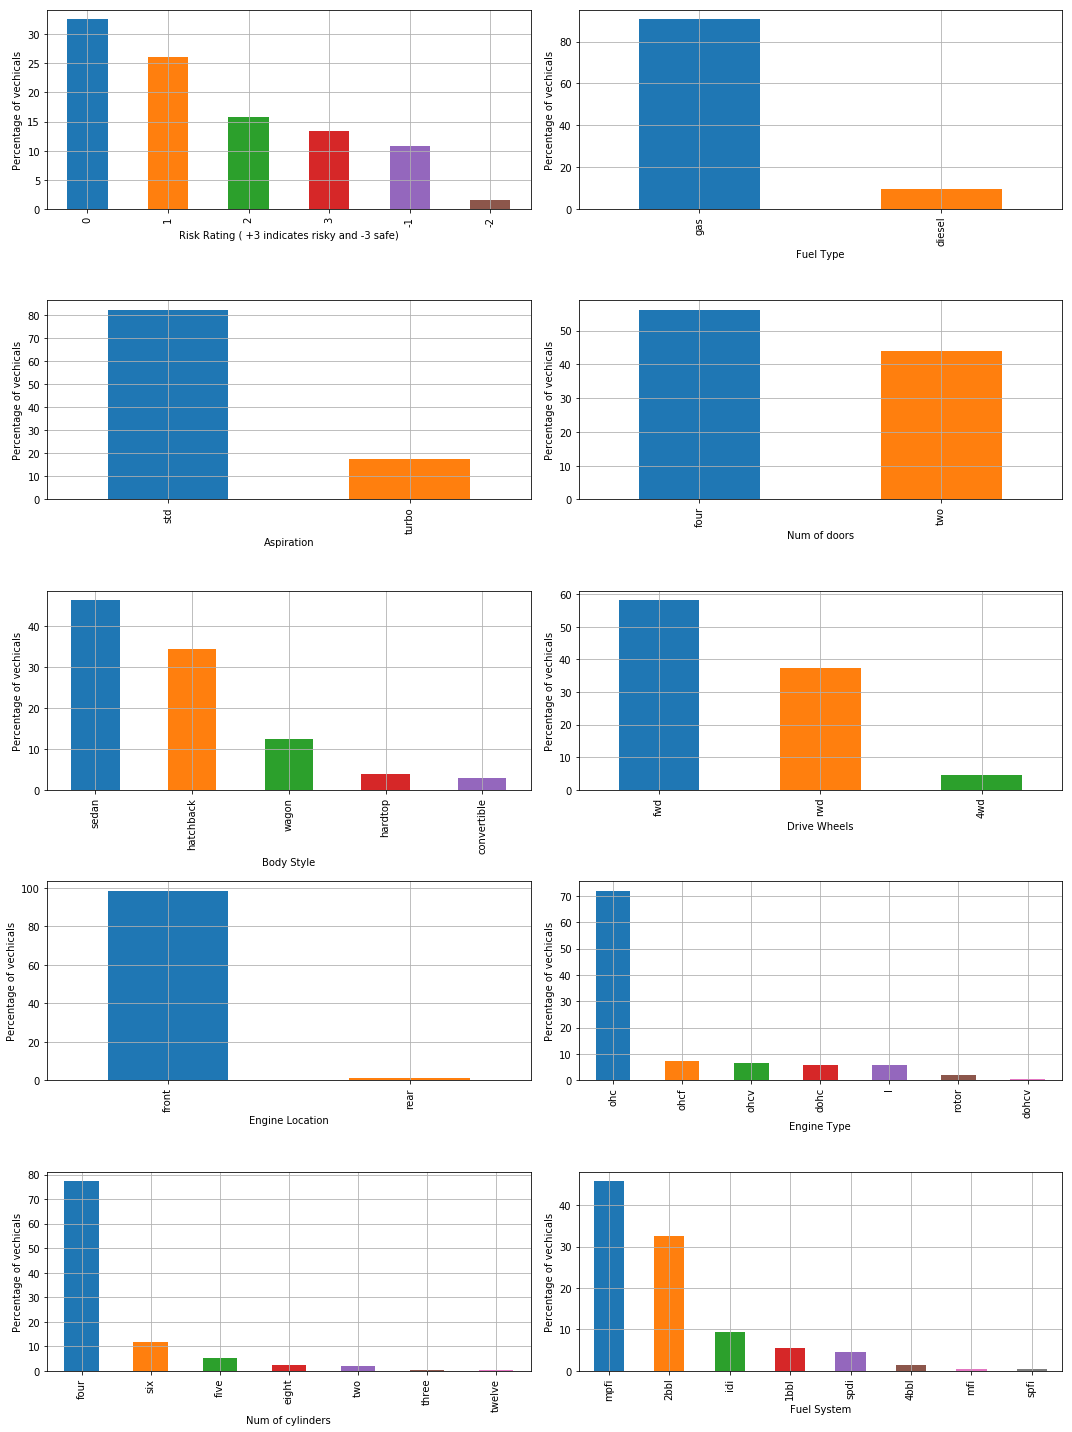

In [23]:
# Plot of non-contineous variables

plt.figure(1)
plt.subplot(521)
(df["symboling"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(15,20))
plt.xlabel("Risk Rating ( +3 indicates risky and -3 safe)")
plt.ylabel("Percentage of vechicals")
plt.grid()

plt.subplot(522)
(df["fuel-type"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(15,20))
plt.xlabel("Fuel Type")
plt.ylabel("Percentage of vechicals")
plt.grid()

plt.subplot(523)
(df["aspiration"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(15,20))
plt.xlabel("Aspiration")
plt.ylabel("Percentage of vechicals")
plt.grid()

plt.subplot(524)
(df["num-of-doors"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(15,20))
plt.xlabel("Num of doors")
plt.ylabel("Percentage of vechicals")
plt.grid()

plt.subplot(525)
(df["body-style"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(15,20))
plt.xlabel("Body Style")
plt.ylabel("Percentage of vechicals")
plt.grid()

plt.subplot(526)
(df["drive-wheels"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(15,20))
plt.xlabel("Drive Wheels")
plt.ylabel("Percentage of vechicals")
plt.grid()

plt.subplot(527)
(df["engine-location"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(15,20))
plt.xlabel("Engine Location")
plt.ylabel("Percentage of vechicals")
plt.grid()

plt.subplot(528)
(df["engine-type"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(15,20))
plt.xlabel("Engine Type")
plt.ylabel("Percentage of vechicals")
plt.grid()

plt.subplot(529)
(df["num-of-cylinders"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(15,20))
plt.xlabel("Num of cylinders")
plt.ylabel("Percentage of vechicals")
plt.grid()

plt.subplot(5,2,10)
(df["fuel-system"].value_counts(normalize=True)*100).plot(kind="bar", figsize=(15,20))
plt.xlabel("Fuel System")
plt.ylabel("Percentage of vechicals")
plt.grid()


plt.tight_layout()
plt.show()

Informations from the above plot

1. 35% of the vehicals has Risk Rating as 0 followed by 1 with 26%
2. 90% of the vehicals has gas fuel type
3. 82% of the vehicals has std Aspiration
4. 60% of the vehicals has 4 doors
5. 48% of the vehicals has body style as sedan followed by hatchback with 34%
6. 58% of the vehicals has fwd Drive wheels
7. 99% of the vehicals has front engine location
8. 71% of the vehicals has ohc engine type
9. 78% of the vehicals has four number of cylinder
10. 48% of the vehicals has 1bbl fuel system followed by 2bbl with 32%

In [24]:
# For priting unique values of columns with object data type
for label in df.columns:
    if(df[label].dtypes=="O"):
        print("Unique elements present in column: ",label)
        print("------------------------------------------------")
        print(df[label].unique())
        print("-"*120)
        print()

Unique elements present in column:  make
------------------------------------------------
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
------------------------------------------------------------------------------------------------------------------------

Unique elements present in column:  fuel-type
------------------------------------------------
['gas' 'diesel']
------------------------------------------------------------------------------------------------------------------------

Unique elements present in column:  aspiration
------------------------------------------------
['std' 'turbo']
------------------------------------------------------------------------------------------------------------------------

Unique elements present in column:  num-of-doors
------------------------------------------------
['t

In [25]:
# Process the categorical columns i.e., assigning the numerical value to words

# create the Labelencoder object
le = LabelEncoder()

#convert the categorical columns into numeric
for label in df.columns:
    if(df[label].dtypes=="O"):
        df[label] = le.fit_transform(df[label])

#display the initial records
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [26]:
# select columns other than 'price'
# dropping the 'price' columns and assign in x
x=df.drop(["price"],axis=1)

# assigning the price column as y
y=df["price"]

# Split into training and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=5,test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(162, 25)
(162,)
(41, 25)
(41,)


In [27]:
# Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization.
 
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [28]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
y_pred=model.predict(x_test)
y_pred

array([ 4793.56569054,  8454.06120048,  6306.8833809 , 45859.88909348,
        9324.24806282, 16853.07894121, 19465.09216765,  7396.9156996 ,
       17023.66474498,  8850.74311781, 20030.60748623,  7396.9156996 ,
        5040.27645546,  9646.30245341,  8614.57636947,  8662.90893459,
        7887.83175167,  5802.15061337, 12385.79680323, 20673.21385238,
       13653.95849455,  7492.11743725,  9813.04977367,  6764.53396307,
       19009.74752264, 15078.15531   , 12898.24832347, 17254.58245857,
       11484.05230645,  7134.0355366 ,  8486.31865188,  6931.72634001,
        9483.89528567,  7799.93071287, 11265.73701681,  6619.74897826,
        8840.56393387, 30373.94577118,  6103.1407123 ,  6747.87112427,
       12621.9163991 ])

In [30]:
print("Accuracy of the model is {:.2f} %" .format(model.score(x_test,y_test)*100))

Accuracy of the model is 81.39 %
